In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline
#加载数据
data1=pd.read_excel("meal_order_detail.xlsx",sheet_name="meal_order_detail1")
data2=pd.read_excel("meal_order_detail.xlsx",sheet_name="meal_order_detail2")
data3=pd.read_excel("meal_order_detail.xlsx",sheet_name="meal_order_detail3")
# 数据预处理
#合并表格数据--按照行拼接数据
data=pd.concat([data1,data2,data3],axis=0)
# data.head(5)
data.dropna(axis=1,inplace=True)
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [2]:
#统计卖出菜品的平均价格
round(data["amounts"].mean(),2)   #方法1：pd自带函数
round(np.mean(data["amounts"]),2)    #方法：np的函数

np.float64(44.82)

dishes_name
白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: count, dtype: int64
0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


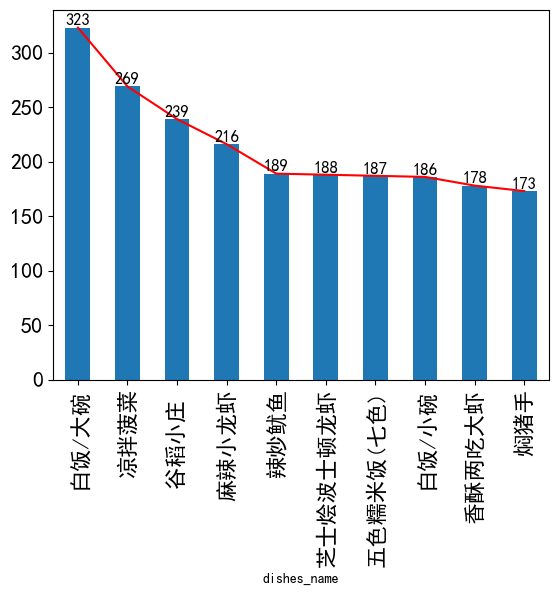

In [3]:
#频数统计，什么菜最受欢迎,取前十名
dishes_count=data["dishes_name"].value_counts()[:10]
print(dishes_count)
#数据可视化matplotlib
dishes_count.plot(kind="line",color="r")
dishes_count.plot(kind="bar",fontsize=16)
for x,y in enumerate(dishes_count):
    print(x,y)
    plt.text(x,y+2,y,ha="center",fontsize=12)

order_id
398     36
1295    29
465     27
1078    27
582     27
1311    26
1033    25
392     24
1166    24
672     24
Name: count, dtype: int64


Text(0, 0.5, '点菜种类')

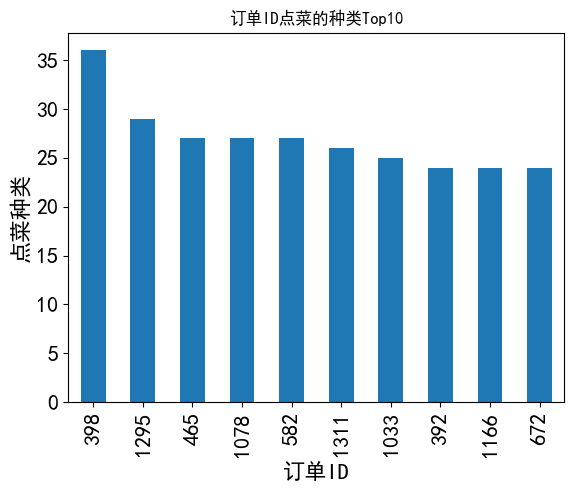

In [4]:
#订单点菜的种类最多
data_group=data["order_id"].value_counts()[:10]
print(data_group)
data_group.plot(kind="bar",fontsize=16)
plt.title("订单ID点菜的种类Top10")
plt.xlabel("订单ID",fontsize=16)
plt.ylabel("点菜种类",fontsize=16)


Text(0.5, 1.0, '订单Id点菜数量TOP10')

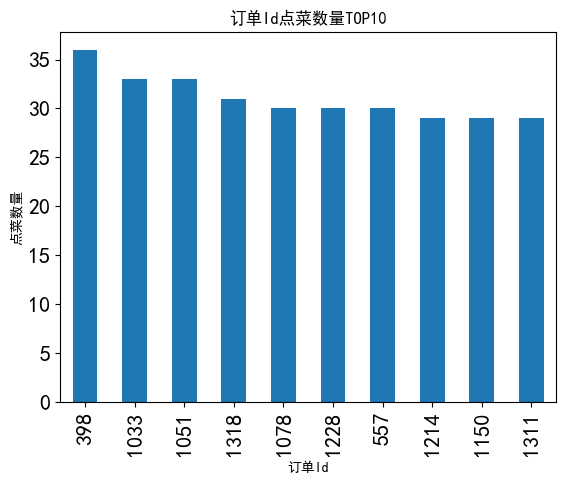

In [5]:
#订单Id点菜数量Top10
data["total_amounts"]=data["counts"]*data["amounts"]
dataGroup=data[["order_id","counts","amounts","total_amounts"]].groupby(by="order_id")
Group_sum=dataGroup.sum()
sort_counts=Group_sum.sort_values(by="counts",ascending=False)
sort_counts["counts"][:10].plot(kind="bar",fontsize=16)
plt.xlabel("订单Id")
plt.ylabel("点菜数量")
plt.title("订单Id点菜数量TOP10")


Text(0.5, 1.0, '消费总额TOP10')

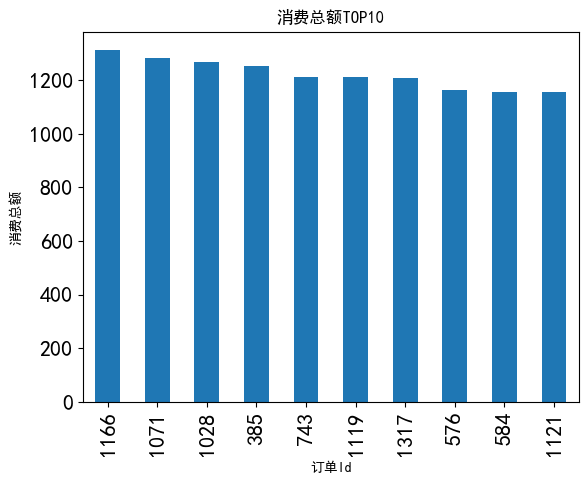

In [6]:
#哪个订单Id点菜金额最多
sort_total_amounts=Group_sum.sort_values(by="total_amounts",ascending=False)
sort_total_amounts["total_amounts"][:10].plot(kind="bar",fontsize=16)
plt.xlabel("订单Id")
plt.ylabel("消费总额")
plt.title("消费总额TOP10")

Text(0.5, 1.0, '订单消费单价前ID')

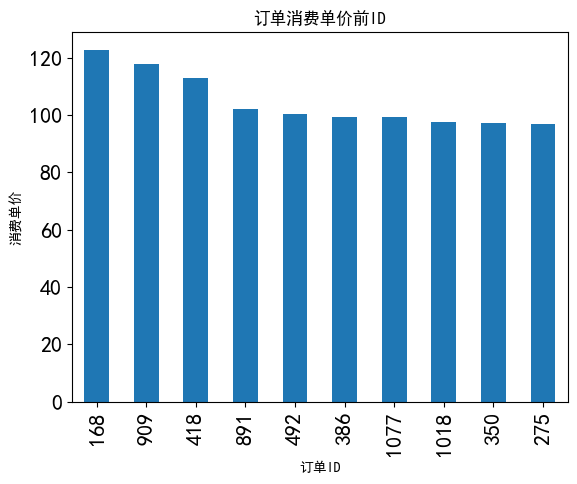

In [7]:
#哪个订单ID平均消费最贵-----前10
Group_sum["average"]=Group_sum["total_amounts"]/Group_sum["counts"]
sort_average=Group_sum.sort_values(by="average",ascending=False)
sort_average["average"][:10].plot(kind="bar",fontsize=16)
plt.xlabel("订单ID")
plt.ylabel("消费单价")
plt.title("订单消费单价前ID")



Text(0.5, 1.0, '订单消费单价前500')

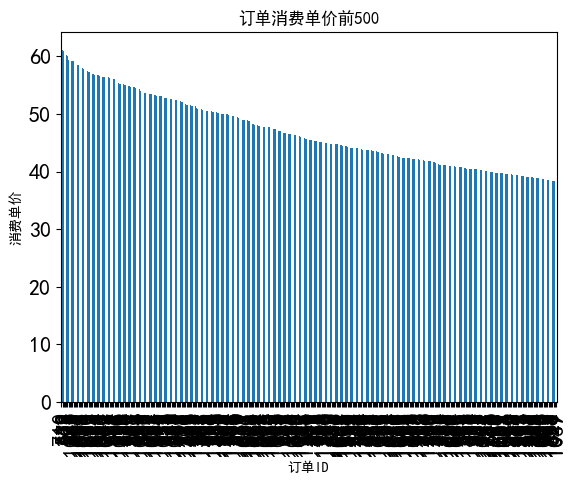

In [8]:
#哪个订单ID平均消费最贵-----前100-500
Group_sum["average"]=Group_sum["total_amounts"]/Group_sum["counts"]
sort_average=Group_sum.sort_values(by="average",ascending=False)
sort_average["average"][100:500].plot(kind="bar",fontsize=16)
plt.xlabel("订单ID")
plt.ylabel("消费单价")
plt.title("订单消费单价前500")

Text(0.5, 1.0, '下单量与小时的关系')

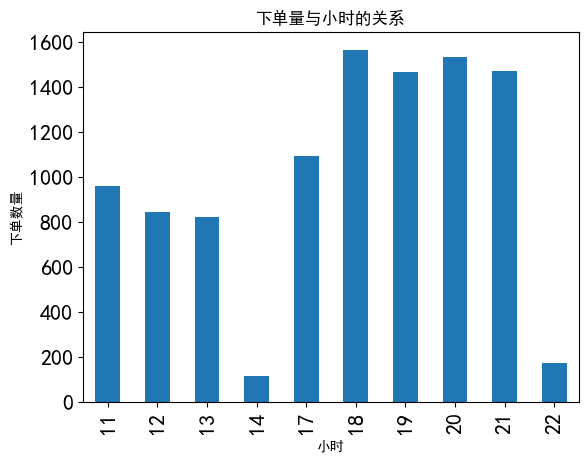

In [9]:
#一天当中什么时间段，点菜量比较集中（hour)
data["hourcount"]=1   #新列，用作计时器
data["time"]=pd.to_datetime(data["place_order_time"])
data["hour"]=data["time"].map(lambda x:x.hour)
group_by_hour=data.groupby(by="hour").count()["hourcount"]
group_by_hour.plot(kind="bar",fontsize=16)
plt.xlabel("小时")
plt.ylabel("下单数量")
plt.title("下单量与小时的关系")


Text(0.5, 1.0, '点菜数量与8月份日期的关系')

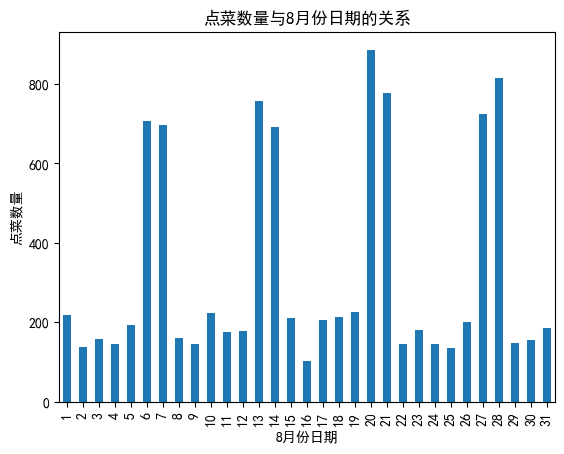

In [10]:
#哪一天的订单数量最多
data["daycount"]=1
data["day"]=data["time"].map(lambda x:x.day) #解析出天
group_by_day=data.groupby(by="day").count()["daycount"]
group_by_day.plot(kind="bar")
plt.xlabel("8月份日期")
plt.ylabel("点菜数量")
plt.title("点菜数量与8月份日期的关系")



Text(0.5, 1.0, '点菜数量与星期的关系')

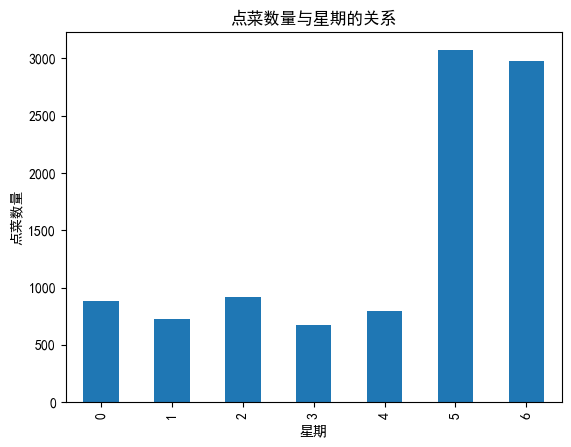

In [11]:
#点菜数量与星期关系图
data["weekcount"]=1
data["weekday"]=data["time"].map(lambda x:x.weekday())
group_by_weekday=data.groupby(by="weekday").count()["weekcount"]
group_by_weekday.plot(kind="bar")
plt.xlabel("星期")
plt.ylabel("点菜数量")
plt.title("点菜数量与星期的关系")
